<a href="https://colab.research.google.com/github/TheIshaanTiwari/sem/blob/main/load_specific_dataset_and_conduct_cohort_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install cellxgene_census

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 5.1 MB/s eta 0:00:00
  Created wheel

In [7]:
import cellxgene_census
import scanpy

In [25]:
!pip install scanpy
import urllib
import scanpy

urllib.request.urlretrieve('https://datasets.cellxgene.cziscience.com/5d871206-9489-4d9f-8106-94305ccb1c3a.h5ad', 'dataset.h5ad')

('dataset.h5ad', <http.client.HTTPMessage at 0x7d33c1d5eb00>)

In [26]:
adata = scanpy.read_h5ad("dataset.h5ad")

print(adata)

AnnData object with n_obs × n_vars = 23197 × 33091
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'


In [27]:
obs_attributes = adata.obs.columns.tolist()
var_attributes = adata.var.columns.tolist()

print("Obs attributes:", obs_attributes)
print("Var attributes:", var_attributes)

Obs attributes: ['nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid']
Var attributes: ['feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type']


In [40]:
genes_of_interest = ['SLC26A3', 'RASGEF1B', 'RP11-701H24.9', 'LINGO1', 'PDE4DIP', 'RP11-289H16.1', 'AC159540.1', 'RP11-219A15.1', 'LINC01609', 'PHYHIP', 'RP11-745L13.2']
adata_filtered = adata[:,adata.var['feature_name'].isin(genes_of_interest)]
print(adata_filtered)

View of AnnData object with n_obs × n_vars = 23197 × 6
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'


In [41]:
unmatched_gene_ids = ['ENSG00000224363','ENST00000557230', 'ENST00000551312','ENSG00000230606', 'ENST00000411738', 'ENST00000430893','ENSG00000266302','ENSG00000251555']
adata_slice_unmatched_genes = adata[:,adata.var.index.isin(unmatched_gene_ids)]
print(adata_slice_unmatched_genes)

View of AnnData object with n_obs × n_vars = 23197 × 4
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'SORT', 'Amyloid', 'Age', 'RIN', 'nCount_SCT', 'nFeature_SCT', 'nCount_Exon', 'nFeature_Exon', 'PMI', 'Braak', 'Sample.ID', 'Cell.Types', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_umap'


In [46]:
gene_ids = adata.var.index
gene_names = adata.var['feature_name']
gene_mapping = dict(zip(gene_ids, gene_names))
print("Mapping from gene ID to gene name")
for gene_id, gene_name in gene_mapping.items():
    print(f"Gene ID: {gene_id}, Gene Name: {gene_name}")

Streaming output truncated to the last 5000 lines.
Gene ID: ENSG00000228973, Gene Name: ENSG00000228973.1
Gene ID: ENSG00000219445, Gene Name: ENSG00000219445.2
Gene ID: ENSG00000068745, Gene Name: IP6K2
Gene ID: ENSG00000204011, Gene Name: COL5A1-AS1
Gene ID: ENSG00000272922, Gene Name: ENSG00000272922.1
Gene ID: ENSG00000213139, Gene Name: CRYGS
Gene ID: ENSG00000205927, Gene Name: OLIG2
Gene ID: ENSG00000134532, Gene Name: SOX5
Gene ID: ENSG00000272982, Gene Name: ENSG00000272982.1
Gene ID: ENSG00000226822, Gene Name: LINC02785
Gene ID: ENSG00000151655, Gene Name: ITIH2
Gene ID: ENSG00000162510, Gene Name: MATN1
Gene ID: ENSG00000171388, Gene Name: APLN
Gene ID: ENSG00000255108, Gene Name: ENSG00000255108.1
Gene ID: ENSG00000272895, Gene Name: ENSG00000272895.1
Gene ID: ENSG00000233967, Gene Name: ENSG00000233967.7
Gene ID: ENSG00000181449, Gene Name: SOX2
Gene ID: ENSG00000278035, Gene Name: ENSG00000278035.1
Gene ID: ENSG00000127328, Gene Name: RAB3IP
Gene ID: ENSG00000261512, Gen

#Comparing Alzheimer cells with healthy cells

---
##What is happening?

The line below is looking for genes that are more active or less active in people with Alzheimer’s compared to normal (healthy) people.

Gene activity is the level at which a gene is "turned on" or "off." Some genes might be very active in Alzheimer’s but less so in healthy people, or vice versa.

The t-test is a statistical test that checks if the differences in gene activity between the Alzheimer’s group and the normal group are significant.

---
##How exactly is gene activity measured?

Every cell uses genes to make proteins, and mRNA (messenger RNA) is the “blueprint” that cells create when they want to make a protein from a gene.

When a gene is "active" or "expressed," the cell produces more mRNA for that gene.

In single-cell datasets, we measure gene expression by counting how much mRNA is present for each gene in each cell. Higher mRNA counts mean the gene is more active in that cell.

---
##How does the differential analysis work?
To see if a gene is more active in Alzheimer’s versus normal cells, the analysis averages the mRNA counts for each gene across all cells in the Alzheimer’s group and compares this to the average for the normal group.
If a gene has higher average mRNA counts in Alzheimer’s cells than in normal cells, it’s considered more "upregulated" (more active) in Alzheimer’s.

---
##How to interpret the visualization?
```scanpy.pl.rank_genes_groups(adata_filtered, n_genes=10, sharey=False)```

This line generates a *ranking plot*.
* Purpose: This plot tells you which genes are most different between the two groups (in this case, Alzheimer’s vs. normal subjects).
* X-axis (Ranking): The x-axis shows the rank of genes based on how different they are between Alzheimer’s and normal subjects. The gene on the far left is the most different, and the others decrease in importance as you move to the right.
* Y-axis (Score): The y-axis shows a score (often based on statistical significance) that tells you how strongly each gene’s activity differs between the two groups.
* Gene Names: Each label on the plot is a unique identifier for a gene.
Interpretation: Higher scores mean the gene is more strongly associated with Alzheimer’s. So, if a gene is on the far left and has a high score, it could be a key marker or important in the disease.

```scanpy.pl.rank_genes_groups_dotplot(adata_filtered, n_genes=10)```

This line creates a *dot plot*.

* X-axis (Genes): Each column represents one of the top genes that differ between Alzheimer’s and normal groups.
* Y-axis (Groups): There will be two rows labeled for each group (e.g., "Alzheimer disease" and "normal"). This lets us compare the expression of each gene in each group.
* Dot Color (Expression Level): The color of the dot shows how active (expressed) the gene is in each group. Darker colors mean higher expression, while lighter colors mean lower expression.
* Dot Size (Fraction of Cells): The size of each dot shows how many cells in that group express the gene. A bigger dot means more cells are expressing the gene, while a smaller dot means fewer cells.

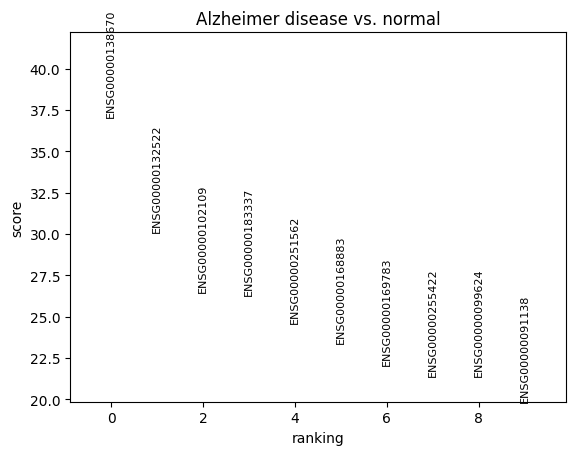

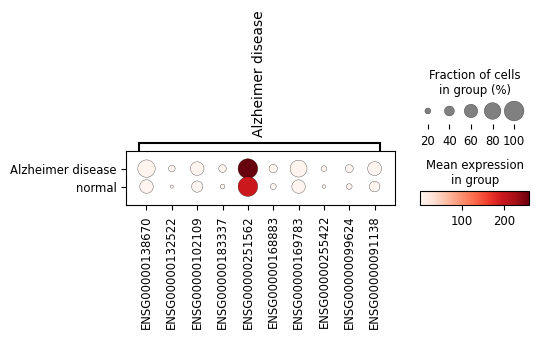

In [45]:
scanpy.tl.rank_genes_groups(adata_filtered, groupby='disease', groups=['Alzheimer disease'], reference='normal', method='t-test')
scanpy.pl.rank_genes_groups(adata_filtered, n_genes=10, sharey=False)
scanpy.pl.rank_genes_groups_dotplot(adata_filtered, n_genes=10)

In [48]:
# Ranking upregulated genes in Alzheimer’s subjects
top_genes = adata_filtered.uns['rank_genes_groups']['names']['Alzheimer disease']
print("Top upregulated genes in Alzheimer’s subjects:", top_genes)
for gene_id in top_genes[:10]:
  print(gene_mapping[gene_id])

Top upregulated genes in Alzheimer’s subjects: ['ENSG00000138670' 'ENSG00000132522' 'ENSG00000102109' ...
 'ENSG00000235244' 'ENSG00000230590' 'ENSG00000189337']
RASGEF1B
GPS2
PCSK1N
BCOR
MALAT1
USP39
LINGO1
ENSG00000255422.4
ATP5F1D
SLC26A3


##How to read violin graphs?
* Wider Sections: If the violin is wide at a certain point, many cells have similar expression levels there.
* Narrow Sections: If it's narrow, not many cells are showing that level of expression.
* Height: If one group's violin is taller (higher) than another's, that means the gene is expressed more in that group.


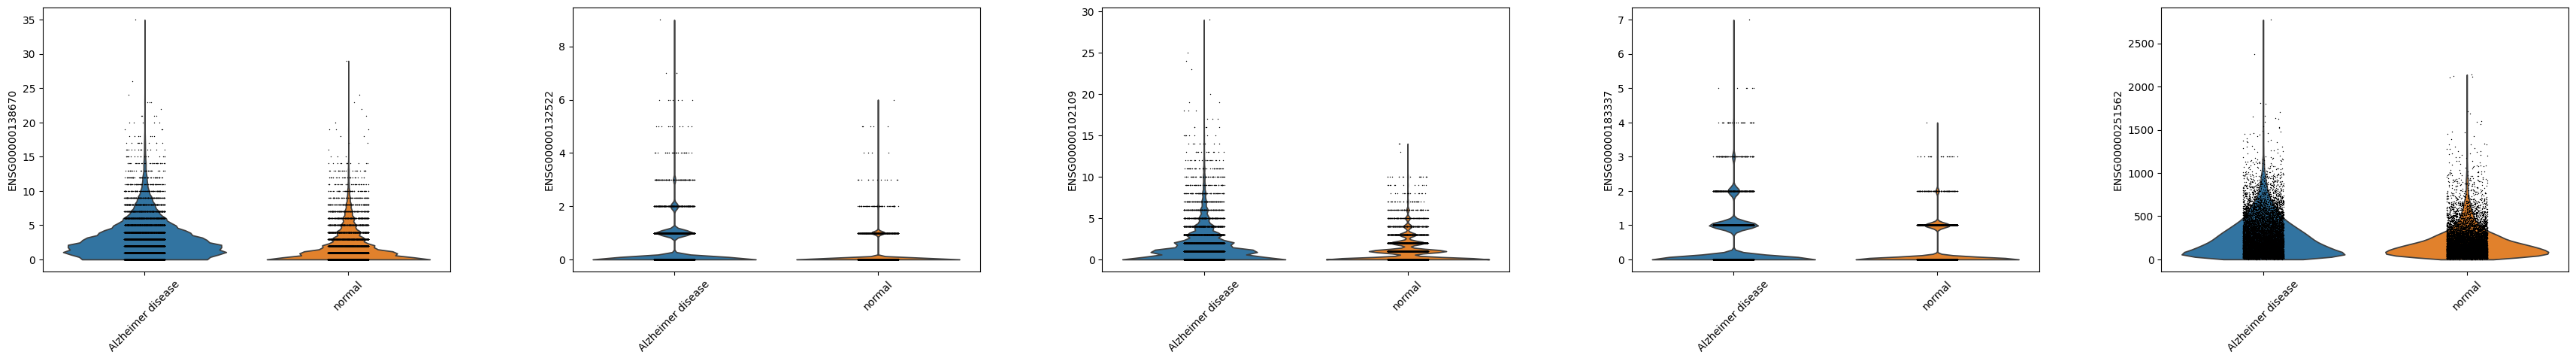

In [12]:
# Plot the expression of specific genes between Alzheimer’s and normal
scanpy.pl.violin(adata, keys=top_genes[:5], groupby='disease', rotation=45)

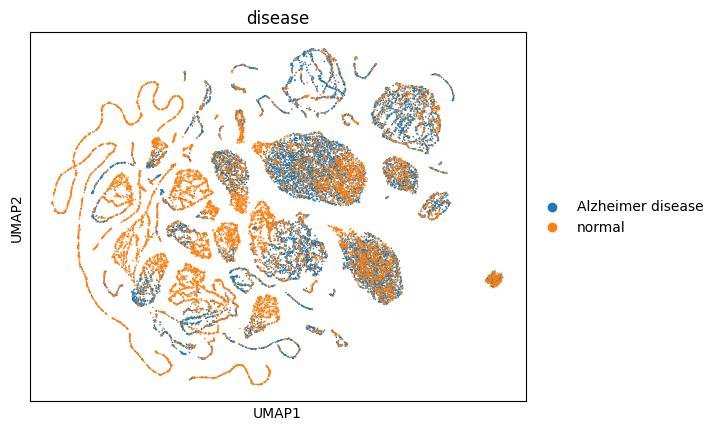

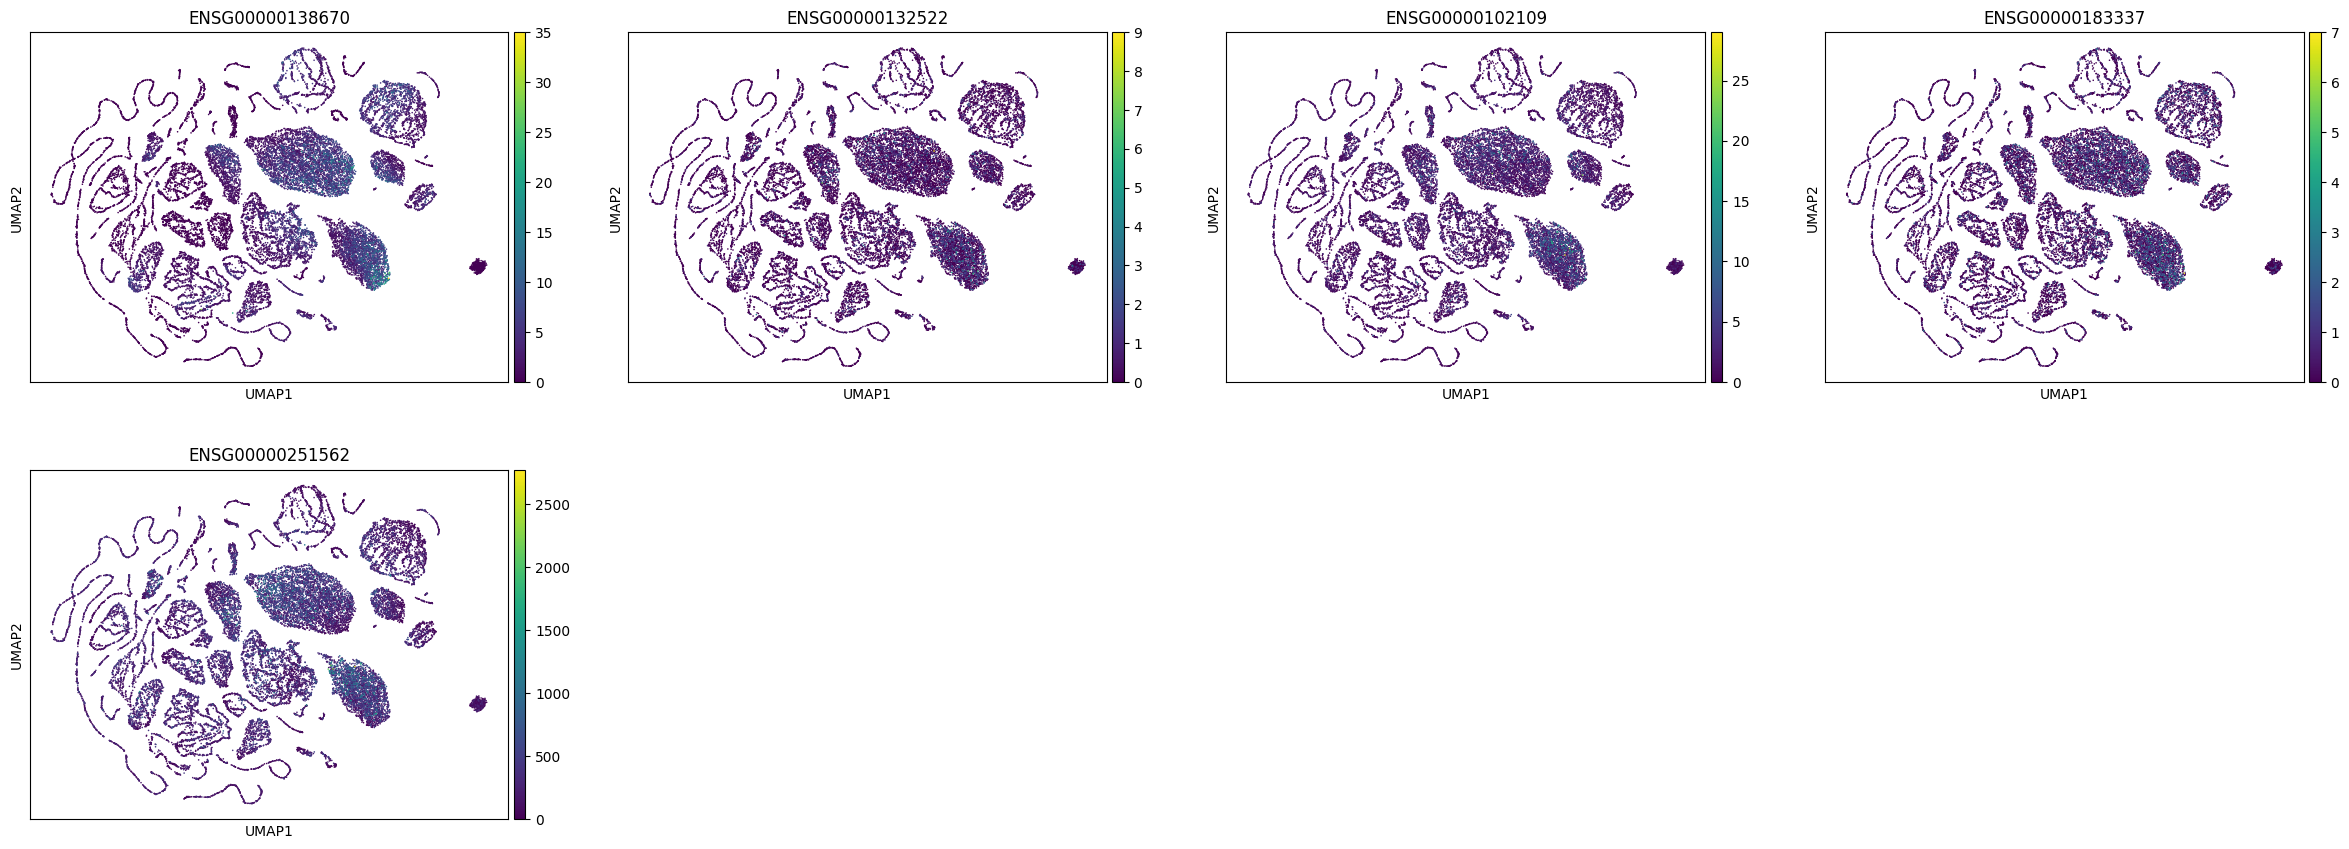

In [13]:
scanpy.pp.neighbors(adata_filtered)
scanpy.tl.umap(adata_filtered)
scanpy.pl.umap(adata_filtered, color='disease')
scanpy.pl.umap(adata_filtered, color=top_genes[:5])

#Age analysis

In [12]:
print(adata.obs['sex'].unique())

['female', 'male']
Categories (2, object): ['female', 'male']


In [49]:
import pandas as pd
adata.obs['age'] = pd.to_numeric(adata.obs['Age'], errors='coerce')
adata.obs['age_group'] = pd.cut(adata.obs['age'], bins=[57, 61, 62, 66, 67, 68, 71, 72, 73, 79, 80, 81, 87, 89], labels=["57", "58-60", "61-62", "63-66", "67", "68", "69-71", "72", "73", "74-79", "80", "81", "82-87"])

In [50]:
grouped_data = adata.obs.groupby(['age_group', 'disease'])
print(grouped_data)

<ipython-input-50-5f2fceedbb83>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = adata.obs.groupby(['age_group', 'disease'])


In [53]:
import pandas as pd
genes_of_interest = ['SLC26A3', 'RASGEF1B', 'LINGO1', 'PDE4DIP', 'LINC01609', 'PHYHIP']
gene_indices = [adata.var[adata.var['feature_name'] == gene].index[0] for gene in genes_of_interest if gene in adata.var['feature_name'].values]

adata_genes_filtered = adata[:, gene_indices]
expression_df = pd.DataFrame(adata_genes_filtered.X.toarray(), columns=genes_of_interest, index=adata.obs.index)
expression_df['disease'] = adata.obs['disease'].values
expression_df['age_group'] = adata.obs['age_group'].values

mean_expression_by_age_disease = expression_df.groupby(['age_group', 'disease'])[genes_of_interest].mean()

print("Mean expression by age group and disease status:")
print(mean_expression_by_age_disease)


Mean expression by age group and disease status:
                              SLC26A3  RASGEF1B    LINGO1   PDE4DIP  \
age_group disease                                                     
57        Alzheimer disease       NaN       NaN       NaN       NaN   
          normal             1.110165  1.908049  1.854698  1.234989   
58-60     Alzheimer disease  1.179308  2.293738  1.851417  1.170483   
          normal                  NaN       NaN       NaN       NaN   
61-62     Alzheimer disease       NaN       NaN       NaN       NaN   
          normal             0.181195  0.351712  0.370925  1.838777   
63-66     Alzheimer disease       NaN       NaN       NaN       NaN   
          normal             1.298712  1.832356  1.981000  1.311155   
67        Alzheimer disease       NaN       NaN       NaN       NaN   
          normal             0.169052  0.343078  0.378405  1.786883   
68        Alzheimer disease       NaN       NaN       NaN       NaN   
          normal            

<ipython-input-53-1d1803814ffb>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_expression_by_age_disease = expression_df.groupby(['age_group', 'disease'])[genes_of_interest].mean()


<ipython-input-54-439c2f1cd021>:12: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['age_group'] = pd.cut(adata.obs['age'], bins=[57, 61, 62, 66, 67, 68, 71, 72, 73, 79, 80, 81, 87, 89], labels=["57", "58-60", "61-62", "63-66", "67", "68", "69-71", "72", "73", "74-79", "80", "81", "82-87"])


<Figure size 1200x800 with 0 Axes>

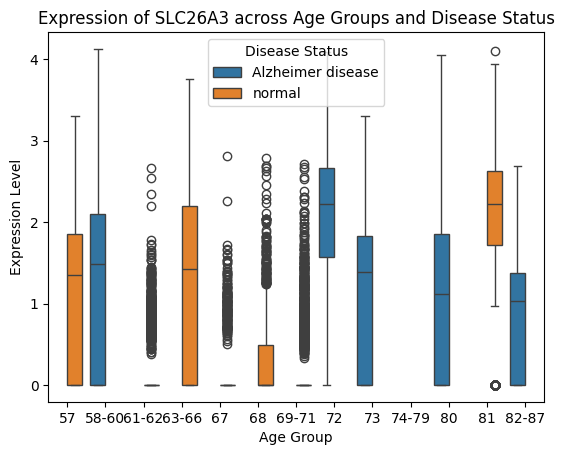

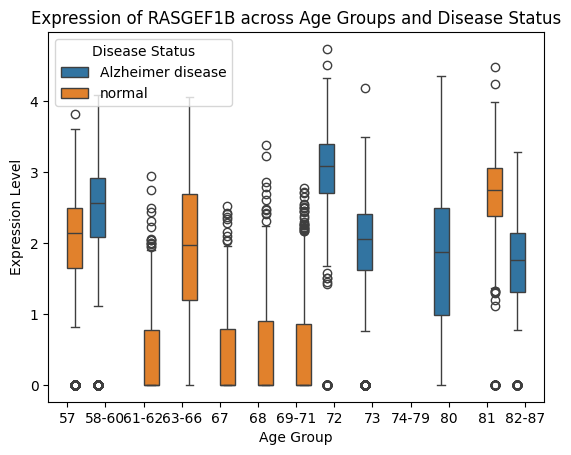

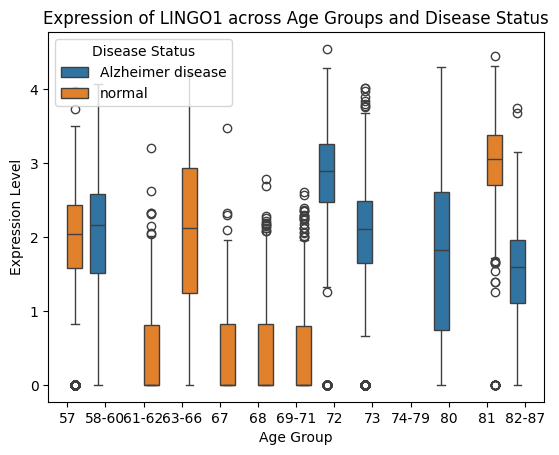

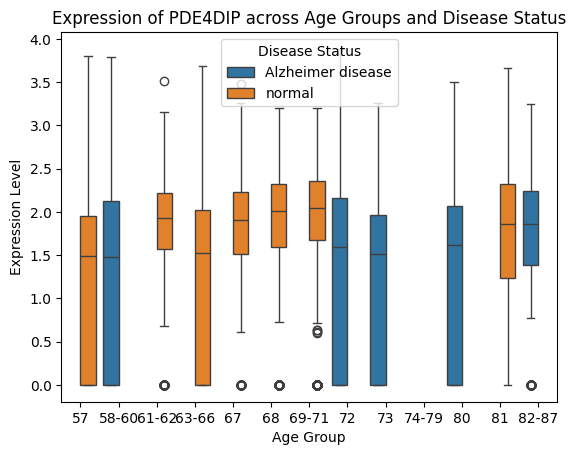

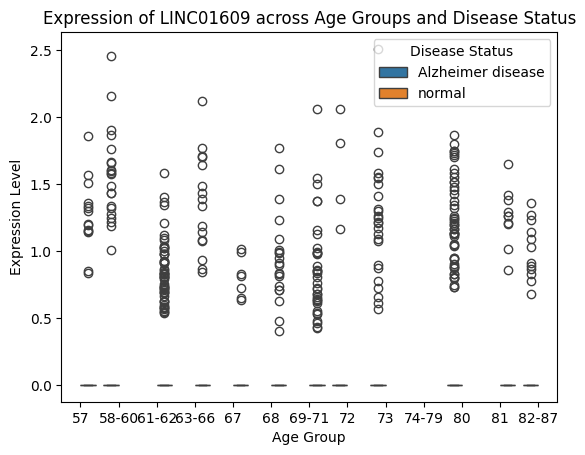

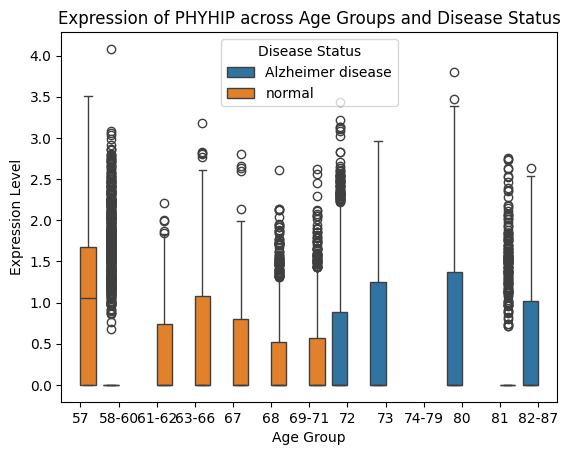

In [54]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the 'Age' column to numeric, forcing errors to NaN
adata.obs['Age'] = pd.to_numeric(adata.obs['Age'], errors='coerce')

# Drop rows where Age is NaN
adata = adata[~adata.obs['Age'].isna()]

# Create age groups based on the cleaned Age data
adata.obs['age_group'] = pd.cut(adata.obs['age'], bins=[57, 61, 62, 66, 67, 68, 71, 72, 73, 79, 80, 81, 87, 89], labels=["57", "58-60", "61-62", "63-66", "67", "68", "69-71", "72", "73", "74-79", "80", "81", "82-87"])
# Verify that 'disease' is also a valid column
if 'disease' not in adata.obs.columns:
    raise ValueError("The 'disease' column is missing from the dataset.")

# Filter to include only genes of interest
genes_of_interest = ['SLC26A3', 'RASGEF1B', 'LINGO1', 'PDE4DIP', 'LINC01609', 'PHYHIP']
gene_indices = [adata.var[adata.var['feature_name'] == gene].index[0] for gene in genes_of_interest if gene in adata.var['feature_name'].values]

# Extract relevant gene expression data
expression_data = pd.DataFrame(adata[:, gene_indices].X.toarray(), columns=genes_of_interest, index=adata.obs.index)
expression_data['age_group'] = adata.obs['age_group'].values
expression_data['disease'] = adata.obs['disease'].values

# Plotting each gene's expression for different age groups and disease categories
plt.figure(figsize=(12, 8))
for gene in genes_of_interest:
    if gene in expression_data.columns:
        plt.figure()
        sns.boxplot(x="age_group", y=gene, hue="disease", data=expression_data)
        plt.title(f"Expression of {gene} across Age Groups and Disease Status")
        plt.ylabel("Expression Level")
        plt.xlabel("Age Group")
        plt.legend(title="Disease Status")
        plt.show()

# Sex analysis

['female', 'male']
Categories (2, object): ['female', 'male']


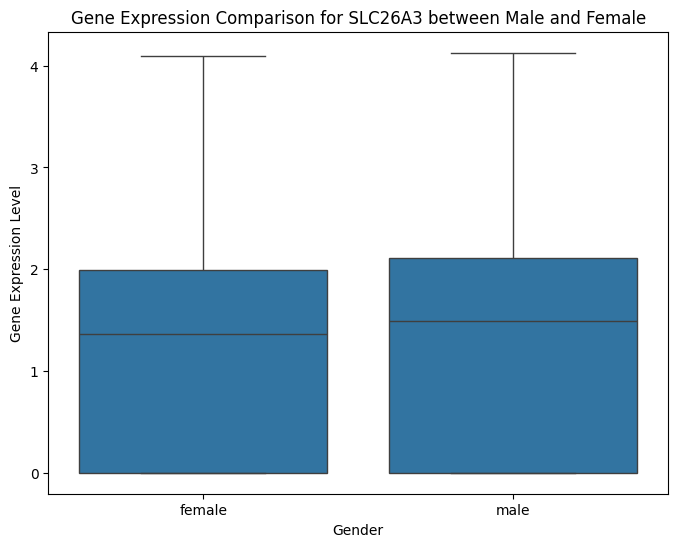

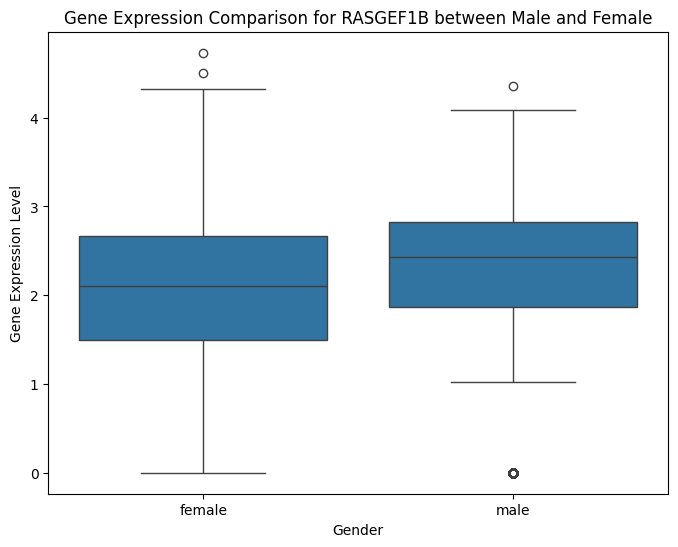

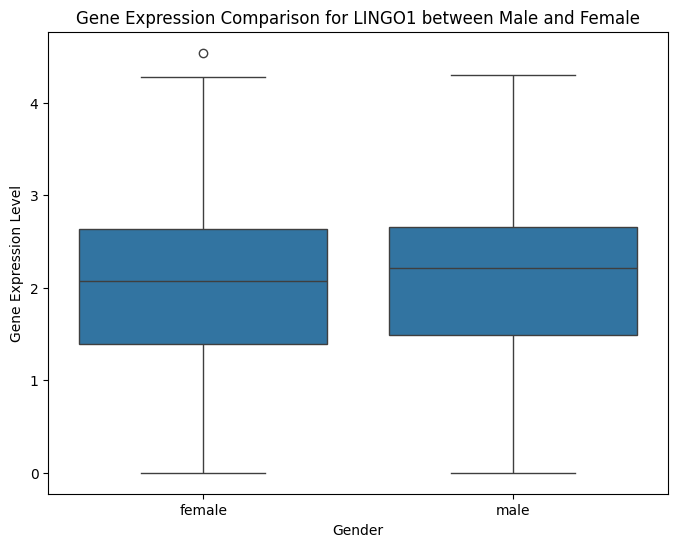

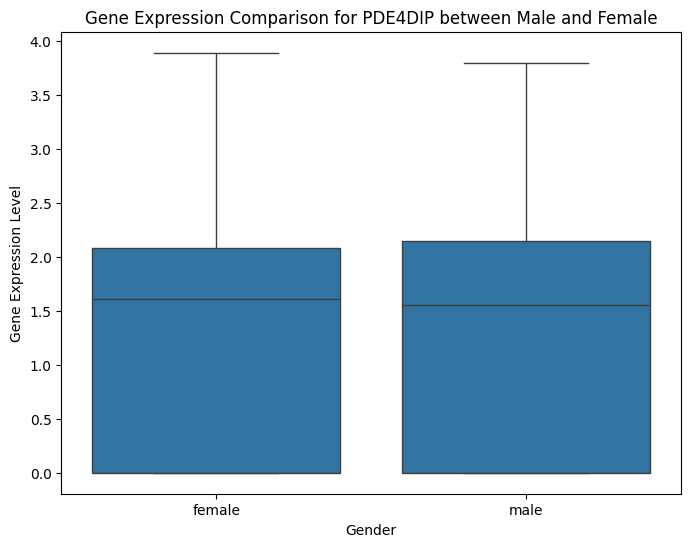

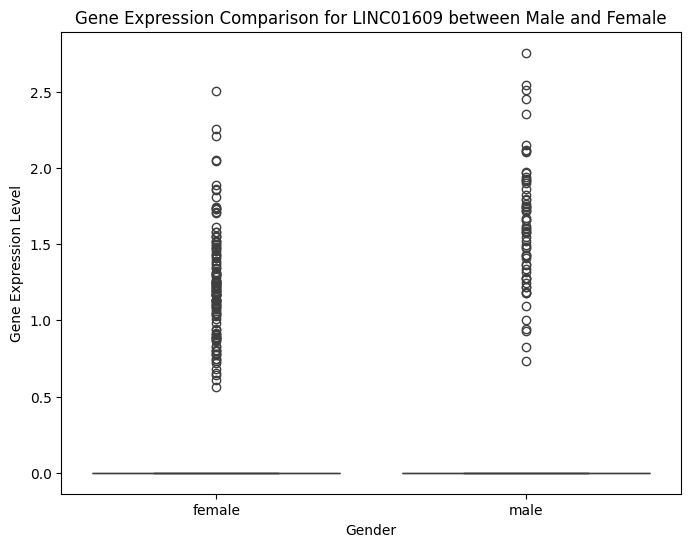

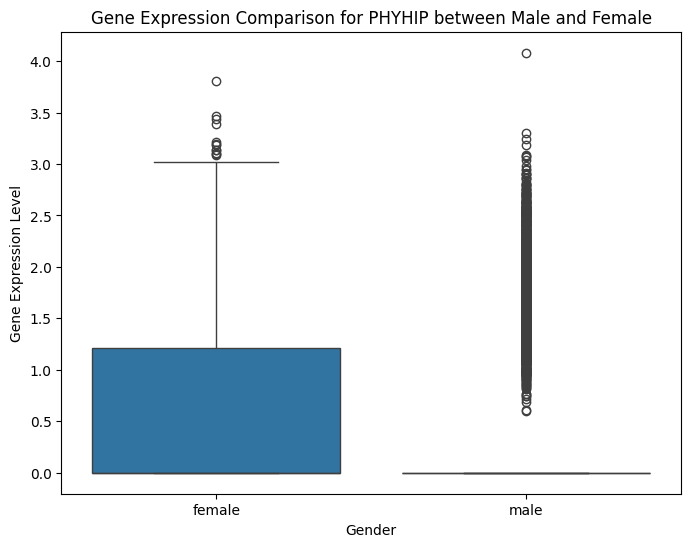

In [55]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'adata' is your AnnData object containing the data
# Filter for Alzheimer's disease cases
adata_alzheimers = adata[adata.obs['disease'] == 'Alzheimer disease']

# Check unique values in the 'sex' column
print(adata_alzheimers.obs['sex'].unique())

# Define the genes of interest
genes_of_interest = ['SLC26A3', 'RASGEF1B', 'LINGO1', 'PDE4DIP', 'LINC01609', 'PHYHIP']

# Ensure the genes are present in the data
present_genes = [gene for gene in genes_of_interest if gene in adata_alzheimers.var['feature_name'].values]

# Filter the dataset to include only the genes of interest
adata_filtered = adata_alzheimers[:, adata_alzheimers.var['feature_name'].isin(present_genes)]

# Create a DataFrame for gene expression values
# Ensure that the shape of the data is correct
gene_expression_data = adata_filtered.X if isinstance(adata_filtered.X, np.ndarray) else adata_filtered.X.A  # Convert to numpy if sparse
df = pd.DataFrame(gene_expression_data, columns=adata_filtered.var['feature_name'].values, index=adata_filtered.obs.index)

# Add the 'sex' column to the DataFrame
df['sex'] = adata_filtered.obs['sex'].values

# Plotting gene expression for male vs female
for gene in present_genes:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='sex', y=gene, data=df)
    plt.title(f"Gene Expression Comparison for {gene} between Male and Female")
    plt.xlabel("Gender")
    plt.ylabel("Gene Expression Level")
    plt.show()

<Figure size 1000x800 with 0 Axes>

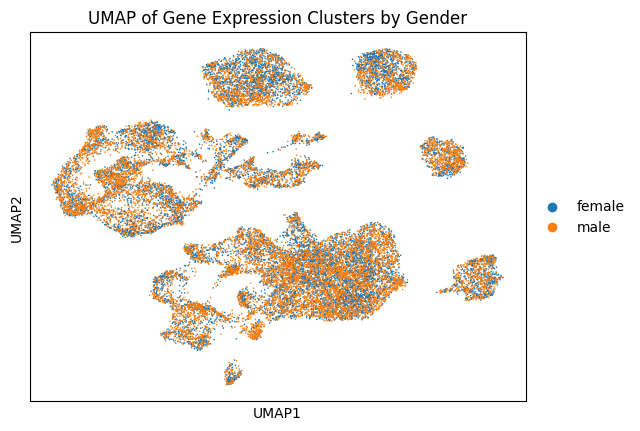

In [57]:
import scanpy as sc
import matplotlib.pyplot as plt

# Ensure data is normalized and log-transformed if not already
sc.pp.normalize_total(adata, target_sum=1e4)  # Normalize
sc.pp.log1p(adata)                            # Log-transform

# Calculate neighbors and run UMAP if not done already
sc.pp.neighbors(adata)  # Builds a graph of cell "neighbors" based on similarity
sc.tl.umap(adata)       # Runs UMAP for dimensionality reduction and visualization

# Plot UMAP colored by 'sex' to differentiate between male and female
plt.figure(figsize=(10, 8))
sc.pl.umap(adata, color='sex', title="UMAP of Gene Expression Clusters by Gender", show=True)
